In [1]:
import pandas as pd

In [2]:
vars_5 = pd.read_csv("transformed_5_vars.csv")

In [3]:
diags = pd.read_csv("./diagnosticos_cleaned.csv")

In [10]:
df = pd.concat([vars_5, diags], axis=1)

In [11]:
df

,Unnamed: 0,Edad,dg_fixed,EESS_ATENCION_Fixed_Num,TipoAtencion_Num,Sexo_num,Unnamed: 0,dg_01_fixed,dg_02_fixed,dg_03_fixed
0,0,60,1,6,0,0,0,U071,J029,B972
1,1,25,1,6,0,0,1,U071,J029,B972
2,2,23,1,6,0,1,2,U071,J029,B972
3,3,29,1,6,0,1,3,U071,J40X,NaN
4,4,23,1,6,0,1,4,U071,J40X,B972
...,...,...,...,...,...,...,...,...,...,...
831,107,68,1,11,0,0,831,U071,NaN,NaN
832,108,68,0,11,0,0,832,U072,NaN,NaN
833,109,42,0,16,0,0,833,U072,NaN,NaN
834,110,58,0,16,0,1,834,U072,NaN,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               836 non-null    int64 
 1   Edad                     836 non-null    int64 
 2   dg_fixed                 836 non-null    int64 
 3   EESS_ATENCION_Fixed_Num  836 non-null    int64 
 4   TipoAtencion_Num         836 non-null    int64 
 5   Sexo_num                 836 non-null    int64 
 6   Unnamed: 0               836 non-null    int64 
 7   dg_01_fixed              836 non-null    object
 8   dg_02_fixed              768 non-null    object
 9   dg_03_fixed              396 non-null    object
dtypes: int64(7), object(3)
memory usage: 65.4+ KB


In [13]:
df.isnull().sum()

Unnamed: 0                   0
Edad                         0
dg_fixed                     0
EESS_ATENCION_Fixed_Num      0
TipoAtencion_Num             0
Sexo_num                     0
Unnamed: 0                   0
dg_01_fixed                  0
dg_02_fixed                 68
dg_03_fixed                440
dtype: int64

In [14]:
df["dg_01_fixed"] = df["dg_01_fixed"].astype('category').cat.codes

In [15]:
df["dg_02_fixed"] = df["dg_02_fixed"].astype('category').cat.codes

In [16]:
df["dg_03_fixed"] = df["dg_03_fixed"].astype('category').cat.codes

In [22]:
del df["Unnamed: 0"]

In [25]:
del df["dg_fixed"]

In [26]:
df

,Edad,EESS_ATENCION_Fixed_Num,TipoAtencion_Num,Sexo_num,dg_01_fixed,dg_02_fixed,dg_03_fixed
0,60,6,0,0,0,15,4
1,25,6,0,0,0,15,4
2,23,6,0,1,0,15,4
3,29,6,0,1,0,24,-1
4,23,6,0,1,0,24,4
...,...,...,...,...,...,...,...
831,68,11,0,0,0,-1,-1
832,68,11,0,0,1,-1,-1
833,42,16,0,0,1,-1,-1
834,58,16,0,1,1,-1,-1


In [18]:
import seaborn as sns


<Axes: >

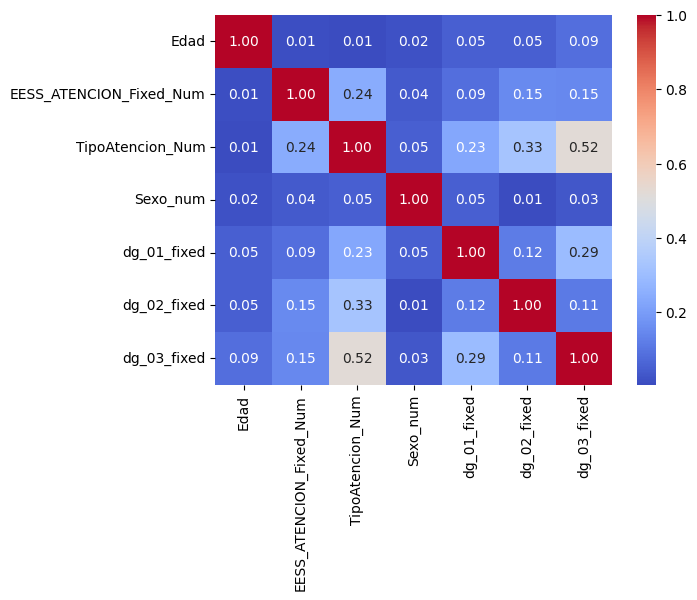

In [29]:
sns.heatmap(abs(df.corr(method="pearson")), cmap="coolwarm", annot=True, fmt=".2f")

<Axes: >

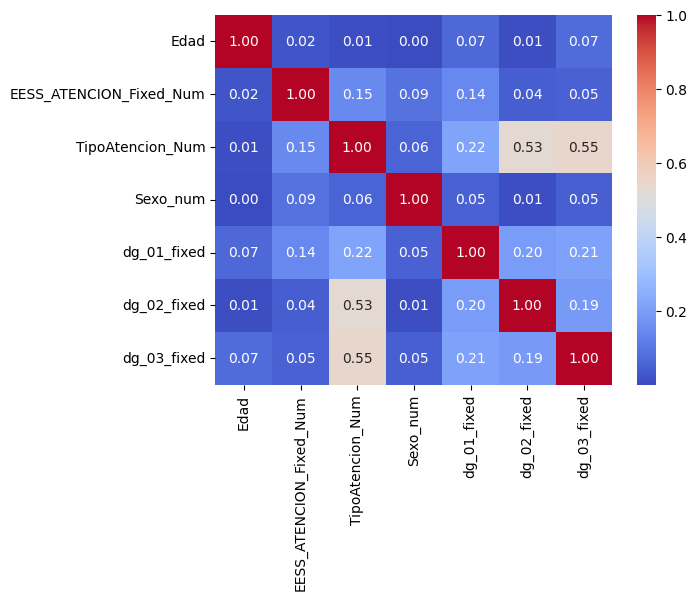

In [30]:
sns.heatmap(abs(df.corr(method="spearman")), cmap="coolwarm", annot=True, fmt=".2f")

<Axes: >

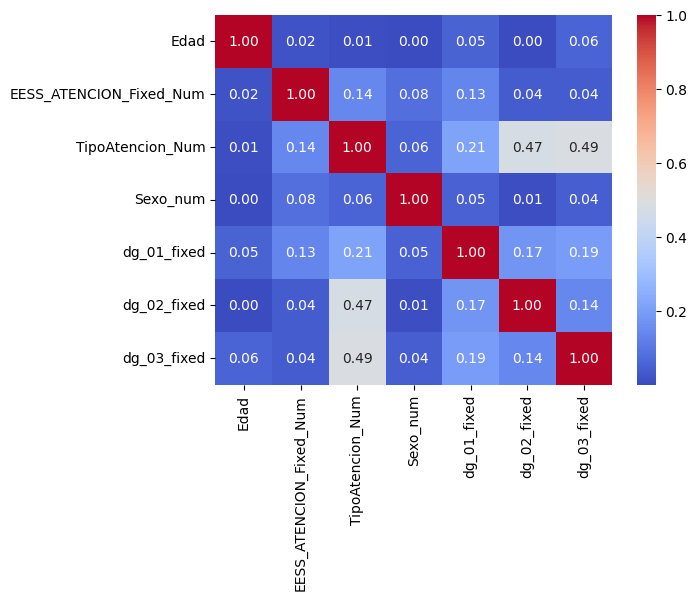

In [31]:
sns.heatmap(abs(df.corr(method="kendall")), cmap="coolwarm", annot=True, fmt=".2f")

In [32]:
df["dg_03_fixed_f"] = df["dg_03_fixed"].apply(lambda x: 0 if x < 0 else x)

<Axes: >

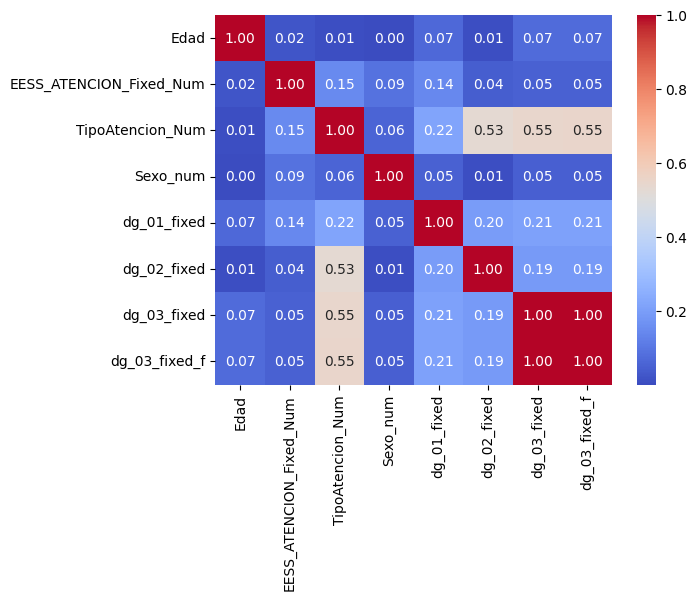

In [33]:
sns.heatmap(abs(df.corr(method="spearman")), cmap="coolwarm", annot=True, fmt=".2f")

In [34]:
df

,Edad,EESS_ATENCION_Fixed_Num,TipoAtencion_Num,Sexo_num,dg_01_fixed,dg_02_fixed,dg_03_fixed,dg_03_fixed_f
0,60,6,0,0,0,15,4,4
1,25,6,0,0,0,15,4,4
2,23,6,0,1,0,15,4,4
3,29,6,0,1,0,24,-1,0
4,23,6,0,1,0,24,4,4
...,...,...,...,...,...,...,...,...
831,68,11,0,0,0,-1,-1,0
832,68,11,0,0,1,-1,-1,0
833,42,16,0,0,1,-1,-1,0
834,58,16,0,1,1,-1,-1,0


In [40]:
df.to_csv("FinalProcess.csv")

In [37]:
df["dg_01_fixed"] = df["dg_01_fixed"].astype('category')
df["dg_02_fixed"] = df["dg_02_fixed"].astype('category')
df["dg_03_fixed"] = df["dg_03_fixed"].astype('category')

<Axes: >

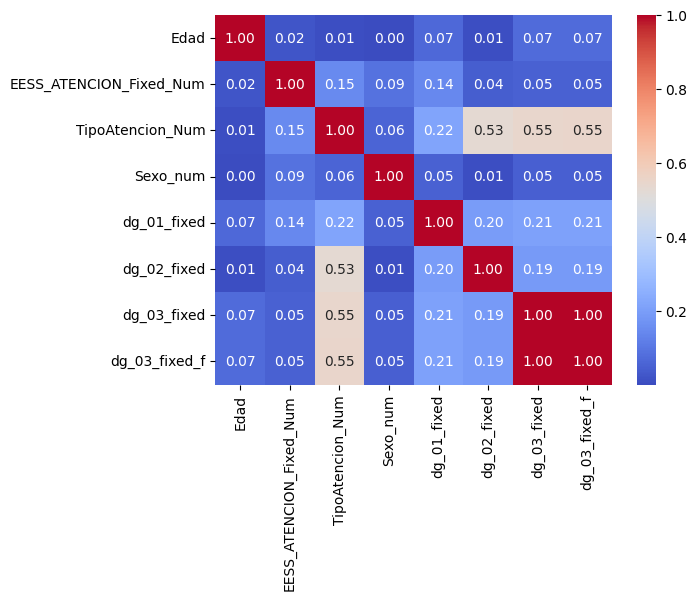

In [38]:
sns.heatmap(abs(df.corr(method="spearman")), cmap="coolwarm", annot=True, fmt=".2f")

## Conclusiones 
Hay una correlación media entre el tipo de Atención:

'AMBULATORIO', 'EMERGENCIA', 'REFERIDO'

con los segundos diagnosticos que tiene por valor 0.53 y con el tercer diagnostico que es 0.55

